In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

## 1. Function to Draw Hyperplane

In [ ]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[0][1]*mi - intercept)/coef[0][0]), mi],[((-coef[0][1]*ma - intercept)/coef[0][0]), ma]])
    plt.plot(points[:,0], points[:,1], label='Hyperplane')
    plt.legend()

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

## 2. Creation of Imbalanced Data Sets

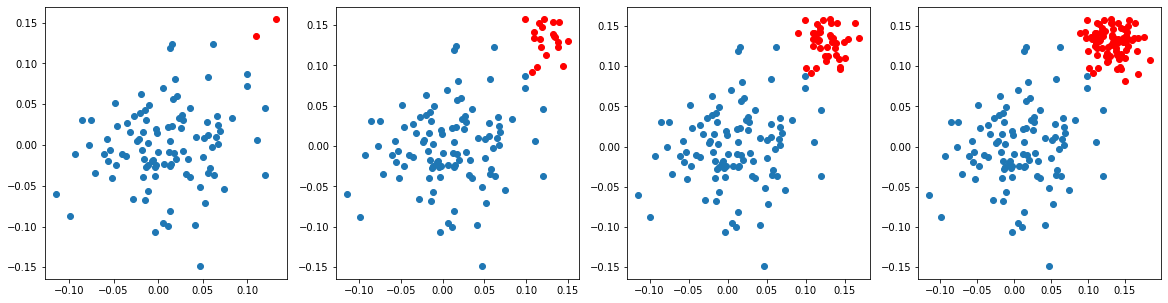

In [ ]:
# Here we are creating 4 sets of 2D imbalanced Data Points in the follwoing Ratio of Positive:Negative
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)

    '''
    HERE WE WILL USE PSEUDO RANDOM NUMBER GENERATOR WITH seed(10) TO GET THE SAME SET OF DATAPOINTS FOR BOTH SVM AND LOGISTIC REGRESSION

    '''
    np.random.seed(10) #To get same set of pseudo random datapoints for both tasks

    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## 3. Task-1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

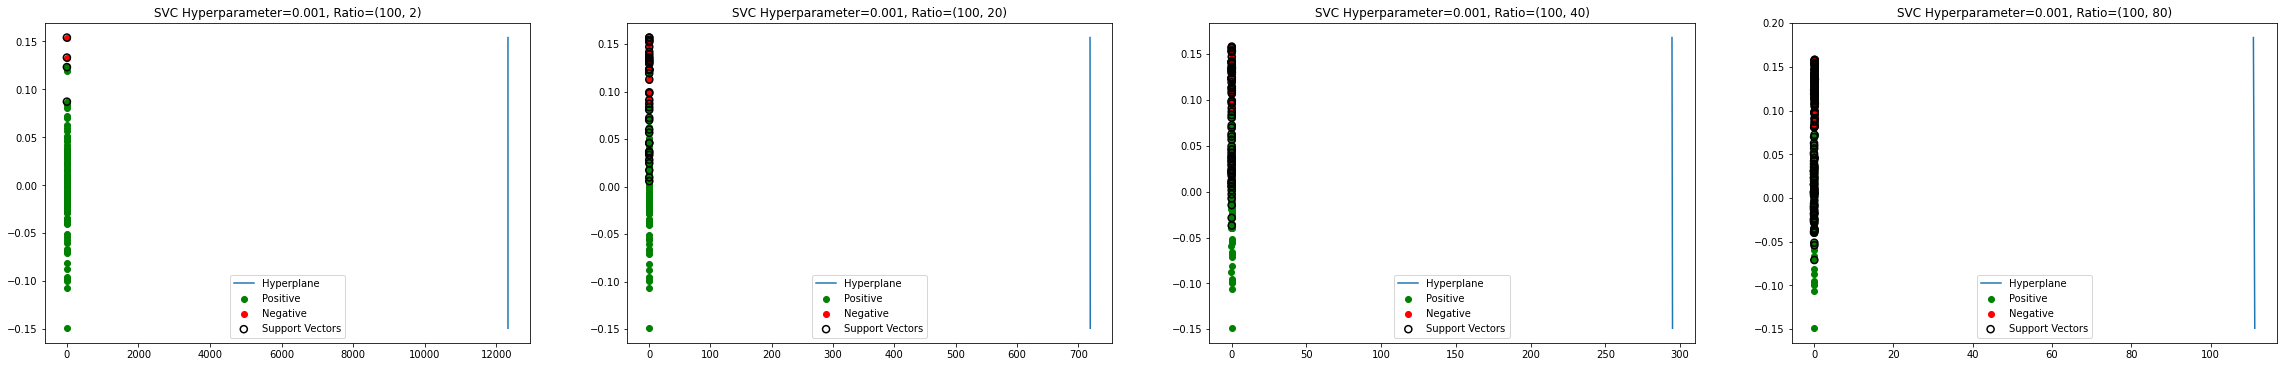

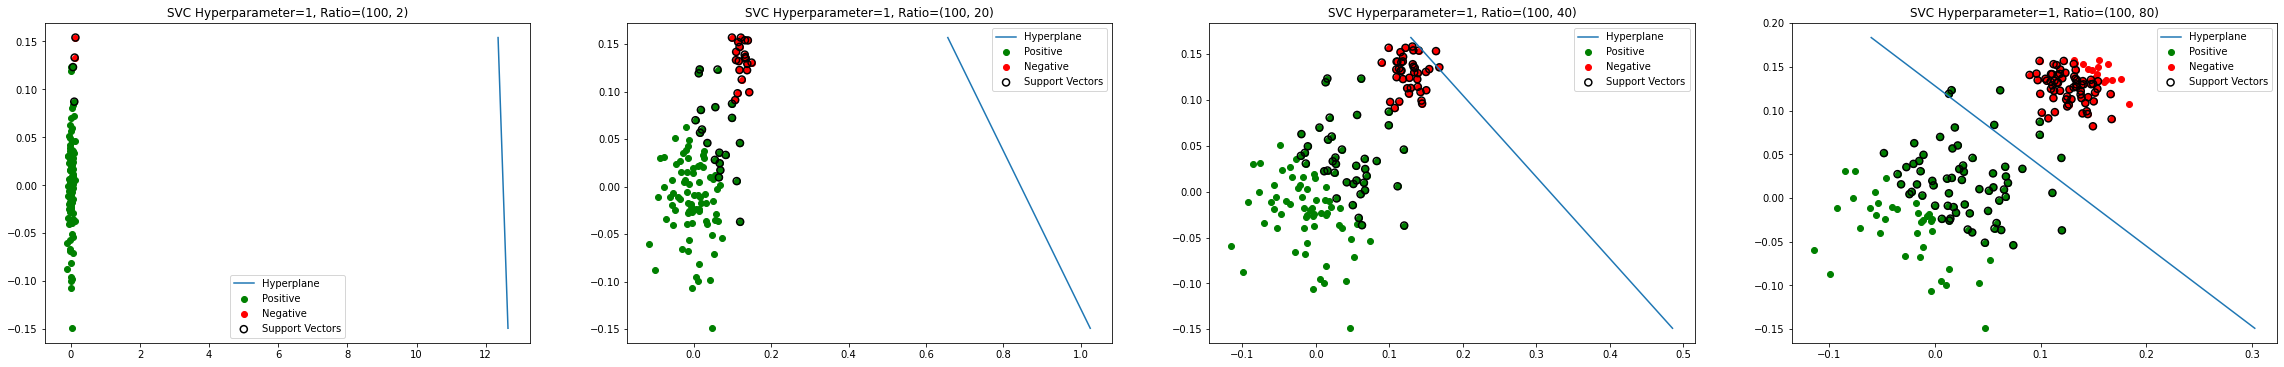

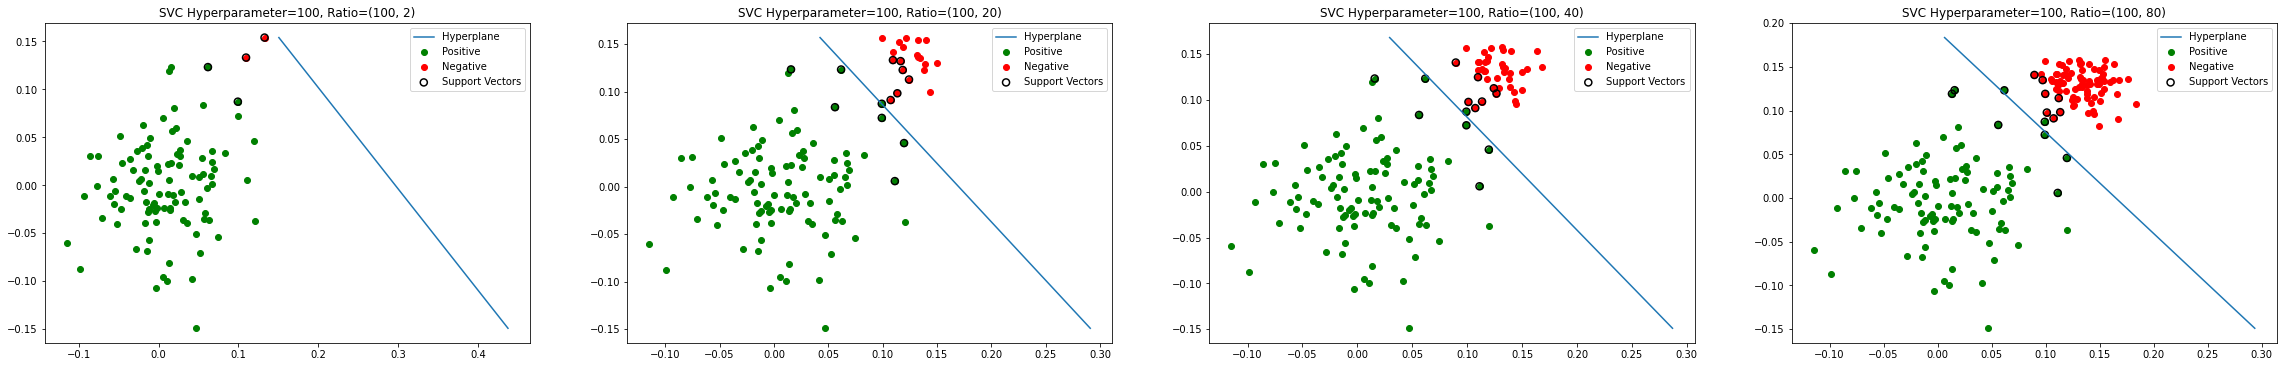

In [ ]:
# Here we are creating 2D Imbalanced DataPoints and applying SVM for each DataSet with different values of Regularization Parameter

C= [0.001, 1, 100] #regularization Parameters
ratios = [(100,2), (100, 20), (100, 40), (100, 80)] #Ratios in which the Data is created

for l in C:
  plt.figure(figsize=(40,20)) #Total Figure Size of all 12 Figures
  for j,i in enumerate(ratios):
    plt.subplot(3,4,j+1) #Plot with 3 rows and 4 columns with index starting from j+1. j=0--> index starts from 0+1=1
    #Create positive and negative datapoints.

    np.random.seed(10) #To generate the same set of pseudo random numbers each time

    X_p=np.random.normal(0,0.05,size=(i[0],2)) #Random Positive Datapoints created from a Normal Distribution of mean=0 and std-dev=0.05
    X_n=np.random.normal(0.13,0.02,size=(i[1],2)) #Random Negative Datapoints created from a Normal Distribution of mean=0.13 and std-dev=0.02

    y_p=np.array([1]*i[0]).reshape(-1,1) #Creation of positive classlabel y_p
    y_n=np.array([0]*i[1]).reshape(-1,1) #Creation of negative classlabel y_n
    X=np.vstack((X_p,X_n)) #Vertical Stacking of Datapoints
    y=np.vstack((y_p,y_n)) #Vertical stacking of Class Labels

    #For each Loop, we are getting the same set of X_p and X_n as we got while creating the datasets

    #Fitting the SVC Function to the Data
    clf= SVC(C=l,kernel='linear') 
    clf.fit(X,y)
    

    #Drawing the Hyperplane
    draw_line(coef=clf.coef_,intercept=clf.intercept_,mi= X.min(), ma=X.max())

    #Scatter Plot
    plt.scatter(X_p[:,0],X_p[:,1],color='green',label='Positive')
    plt.scatter(X_n[:,0],X_n[:,1],color='red',label='Negative')
    plt.title('SVC Hyperparameter={}, Ratio={}'.format(l,i))

    #Plot Support Vectors
    plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=50, linewidth=1.5,facecolors='None', edgecolors='k',label='Support Vectors')

    #Legend
    plt.legend()
  plt.show()

## 4. OBSERVATIONS 

* Here we are implementing Support Vector Machines Binary Classification (SVC) for different imbalanced datasets as shown above with different Hyper parameters (C) mentioned above.

    1. **Case a) C=0.001** - Here the strength of the hyper parameter C decides the strength of the loss-term in the Soft Margin SVM Optimization Problem.We have to minimise loss . If it is too low, the data will be underfit and causes high bias. If it is too high it will be overfit and cause high variance. In this case, the hyperparameter C is too low and therefore the fit model is kind of a weak model. Hence it is classifying all the datapoints as positive. Even as the number of negative datapoints increase and the imbalance in the data gets reduced, the strength of fitting is too less to classify the points correctly

    2. **Case b) C= 1** - When Ratio is (100,2), the dataset is highly imbalanced. But here the hyperparameter significantly influences the loss-term. But as the ratio gets more and more balanced, we see that some of the points have been correctly classified as negative (Ratio=100:40). Here, the hyper parameter is also of decent value. As the data gets more and more balanced (100:80), more points are being correctly classified.

    3. **Case c) C=100** - Here C is significantly influencing the loss term and hence the probability of the points being correctly classified is high. In SVM, the decision surface is the one which maximises the margin the most. There could be many decision surfaces which split the data, but SVM chooses the one which has the highest margin. As the datapoints get balanced, the the model fits the datspoints more accurately



**Overall Conclusion**- SVM is not the best choice for fitting highly imbalanced datasets. But if we balance the datasets using upsampling, downsampling by using class_weights, we can do so.

## 5. Task-2: Applying Logistic Regression

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

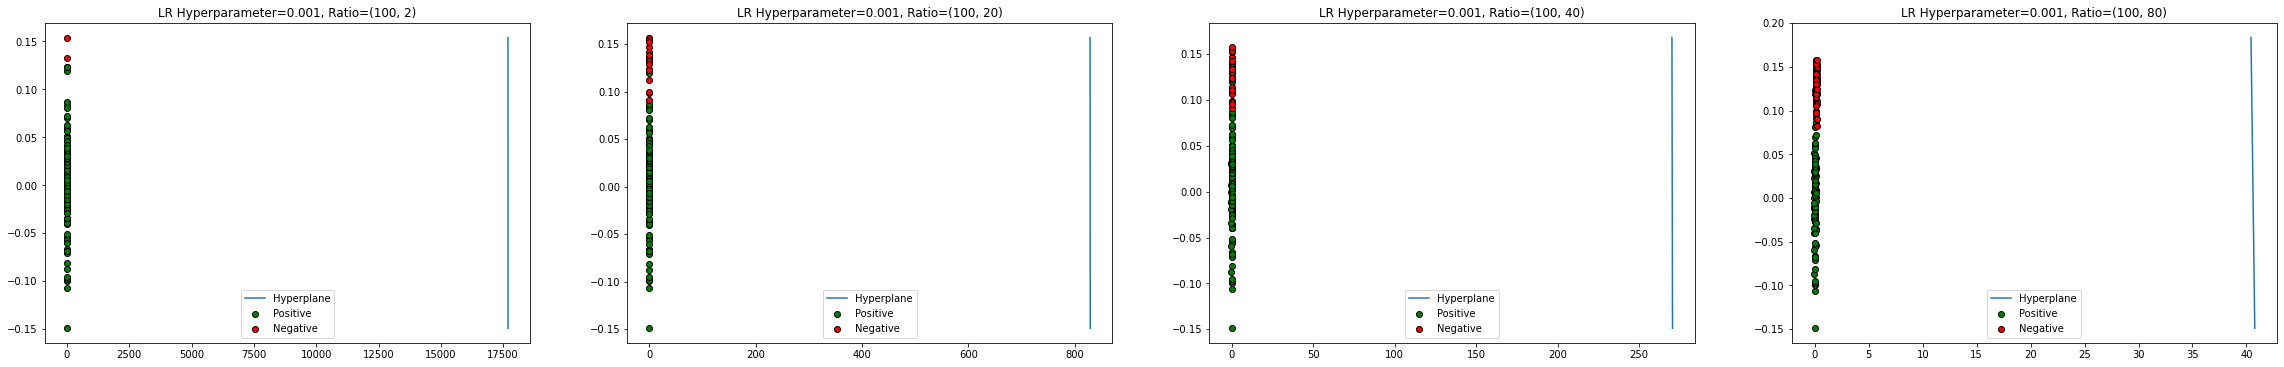

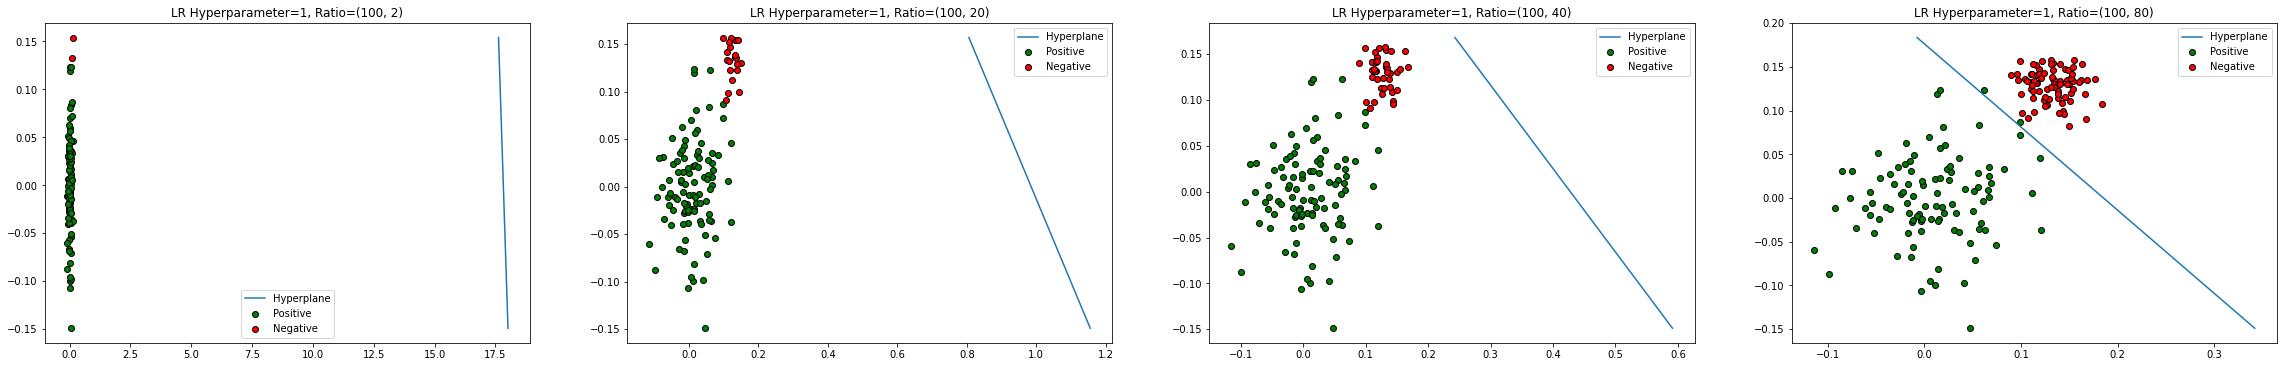

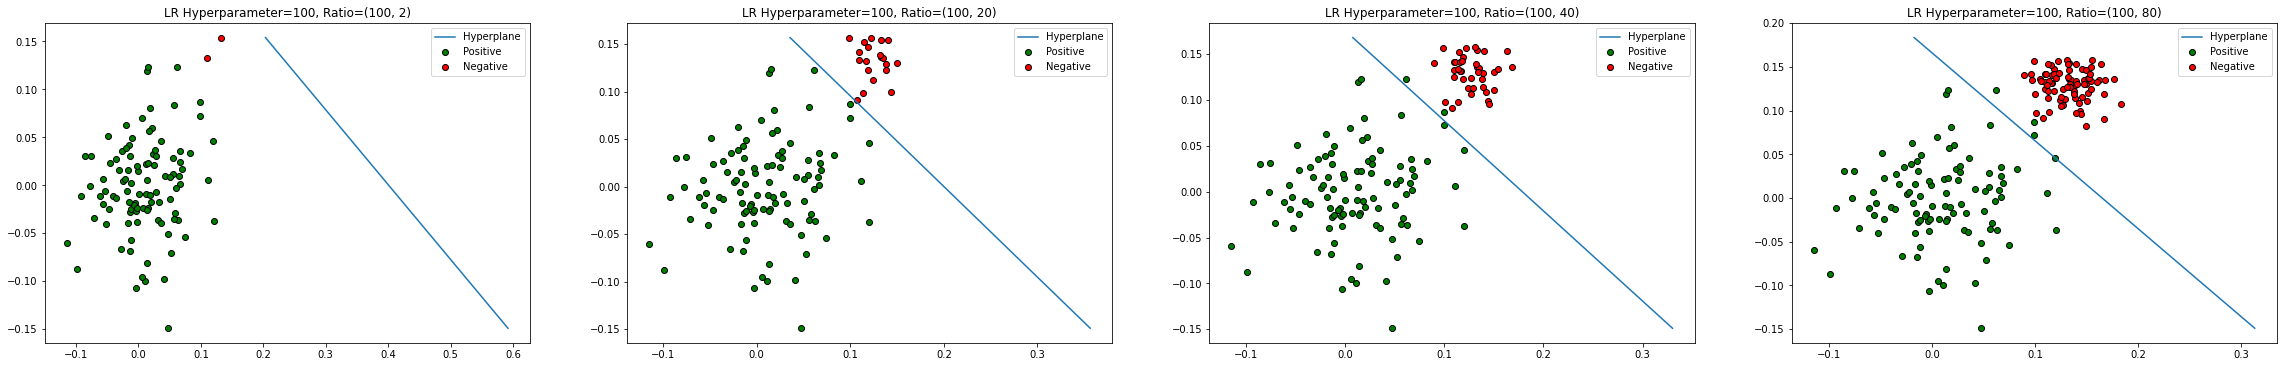

In [ ]:
R=C #Regularization Parameter
for l in R:
  plt.figure(figsize=(40,20))
  for j,i in enumerate(ratios):
    plt.subplot(3,4,j+1)

    np.random.seed(10) #To generate the same set of pseudo random numbers each time (same as the previous dataset)#Random Positive Datapoints created from a Normal Distribution of mean=0 and std-dev=0.05
    X_n=np.random.normal(0.13,0.02,size=(i[1],2)) 

    y_p=np.array([1]*i[0]).reshape(-1,1) 
    y_n=np.array([0]*i[1]).reshape(-1,1) 
    X=np.vstack((X_p,X_n)) 
    y=np.vstack((y_p,y_n)) 

    #Fitting the Logistic Regression Function to the Data
    clf_1= LogisticRegression(penalty='l2',C=l) 
    clf_1.fit(X,y)

    #Drawing the Hyperplane
    draw_line(coef=clf_1.coef_,intercept=clf_1.intercept_,mi= X.min(), ma=X.max())

    #Scatter Plot
    plt.scatter(X_p[:,0],X_p[:,1],color='green',label='Positive',edgecolors='k')
    plt.scatter(X_n[:,0],X_n[:,1],color='red',label='Negative',edgecolors='k')
    plt.title('LR Hyperparameter={}, Ratio={}'.format(l,i))


    #Legend
    plt.legend()
  plt.show()

## 6. OBSERVATIONS

Here the hyperparameter is C= 1/lambda, where lambda= Regularization Strength. Regularization is done to make sure that loss function does not go to complete 0 and thereby overfit the model.

We observe from the above plots that

* As C increases, the regularization strength decreases. There must be a balance between dominance of loss function and regularizer in Logistic Regression which will help us to achieve the best split.

* We must always choose an optimal value of C to achieve Bias-Variance Tradeoff so that we obtain the best Decision Surface.

* Logistic Regression cannot be used directly on highly imbalanced Datasets.
